In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, Image
from scipy import stats
from sklearn.decomposition import PCA
import statsmodels.api as sm
from matplotlib_venn import venn3

In [8]:
df_all=pd.read_pickle('common_data/fivepseq_abundance_tsr.pkl')                
df_High=df_all[(df_all.High>1) & (df_all.Low==0)]
df_Low=df_all[(df_all.Low>1) & (df_all.High==0)]
df_sleuth=pd.read_csv('common_data/Sleuth_results_all.txt')
df_sleuth=df_sleuth.sort_values(by='qval')
df_sleuth=df_sleuth[df_sleuth.ens_gene.astype(str)!='nan']
df_abundance=pd.read_pickle('common_data/Kallisto_abundance.pkl')
tpm_lo=['pt212_lo_TPM','pt221_lo_TPM','pt226_lo_TPM','pt87_lo_TPM','pt214_lo_TPM']
tpm_hi=['pt212_hi_TPM','pt221_hi_TPM','pt226_hi_TPM','pt87_hi_TPM','pt214_hi_TPM']
tpm=np.hstack((tpm_hi,tpm_lo))

Ttest_relResult(statistic=-7.51633149225298, pvalue=0.001677031392662264)


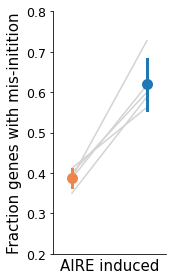

In [9]:
x=df_abundance[df_abundance.columns[df_abundance.columns!='length']].mean(axis=1)
gene_list=np.array(df_sleuth[df_sleuth.target_id.isin(np.array(x[(x>10) & (x<30)].index))].ext_gene)
df=df_High.append(df_Low)
df=df[df.Gene_Name.isin(gene_list)]
df=df[(df.Aire_dep==True)]
masked_df=1*(df[tpm]>0)
i=0
for feature in ['Annotations_short']:
    for name in tpm:
        if df[masked_df[name]==1].shape[0]>4:
            df2=df[masked_df[name]==1]
            total_genes=0
            misinitiated=0
            for gene in df2.Gene_Name.unique():
                unique=df2[df2.Gene_Name==gene].Annotations_short.unique()
                if 'promoter-TSS' in unique and len(unique)==1:
                    gene=0
                else:
                    gene=1
                total_genes=total_genes+1
                misinitiated=misinitiated+gene
            percentage=misinitiated/total_genes
            x=pd.DataFrame(np.vstack((feature,percentage,name.split('_')[0],name.split('_')[1],name,df[masked_df[name]==1].shape[0])).T,columns=['Feature','Percentage','Patient','Hue','pt','N'])
            if i==0:
                y=x
            else:
                y=y.append(x)
            i+=1
y.Percentage=y.Percentage.astype(float)

plt.figure(figsize=(2.5,4))
feature='Annotations_short'
for x in y.Patient.unique():
    plt.plot([0.5,0.1],[y[(y.Feature==feature) & (y.Patient==x) & (y.Hue=='hi')].Percentage,y[(y.Feature==feature) & (y.Patient==x) & (y.Hue=='lo')].Percentage],color='lightgray',zorder=1)

plt.scatter(0.5,y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.mean(),lw=5,zorder=3)
plt.plot([0.5,0.5],[y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.mean()+y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.std(),
               y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.mean()-y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.std()],lw=3,zorder=2)

plt.scatter(.1,y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.mean(),lw=5,zorder=3,color=sns.color_palette('muted')[1])
plt.plot([.1,.1],[y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.mean()+y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.std(),
                y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.mean()-y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.std()],lw=3,zorder=2, color=sns.color_palette('muted')[1])

print(stats.ttest_rel(y[(y.Feature==feature) & (y.Hue=='lo')].Percentage,y[(y.Feature==feature) & (y.Hue=='hi')].Percentage))

plt.xlim([0,.6])
plt.ylim([.2,.8])
plt.xticks([])
plt.yticks(fontsize=12.5)
plt.xlabel('')
#plt.xlabel(fontsize=0)
plt.ylabel('Fraction genes with mis-initition',fontsize=15)
plt.xlabel('AIRE induced',fontsize=15)
sns.despine() 
plt.tight_layout()
plt.savefig('/Users/jac/Documents/AIRE_fraction.png',dpi=500)
plt.savefig('Supplemental_Panels/SFig6A.png',transparent=True,dpi=500)
plt.show()
plt.close()

Ttest_relResult(statistic=0.531954549869123, pvalue=0.6316318304810482)


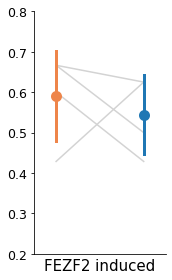

In [12]:
x=df_abundance[df_abundance.columns[df_abundance.columns!='length']].mean(axis=1)
gene_list=np.array(df_sleuth[df_sleuth.target_id.isin(np.array(x[(x>10) & (x<30)].index))].ext_gene)
df=df_High.append(df_Low)
df=df[df.Gene_Name.isin(gene_list)]
df=df[(df.Fezf2_dep==True)]
masked_df=1*(df[tpm]>0)
i=0
for feature in ['Annotations_short']:
    for name in tpm:
        if df[masked_df[name]==1].shape[0]>4:
            df2=df[masked_df[name]==1]
            total_genes=0
            misinitiated=0
            for gene in df2.Gene_Name.unique():
                unique=df2[df2.Gene_Name==gene].Annotations_short.unique()
                if 'promoter-TSS' in unique and len(unique)==1:
                    gene=0
                else:
                    gene=1
                total_genes=total_genes+1
                misinitiated=misinitiated+gene
            percentage=misinitiated/total_genes
            x=pd.DataFrame(np.vstack((feature,percentage,name.split('_')[0],name.split('_')[1],name,df[masked_df[name]==1].shape[0])).T,columns=['Feature','Percentage','Patient','Hue','pt','N'])
            if i==0:
                y=x
            else:
                y=y.append(x)
            i+=1
y.Percentage=y.Percentage.astype(float)

plt.figure(figsize=(2.5,4))
feature='Annotations_short'
for x in y.Patient.unique():
    plt.plot([0.5,0.1],[y[(y.Feature==feature) & (y.Patient==x) & (y.Hue=='hi')].Percentage,y[(y.Feature==feature) & (y.Patient==x) & (y.Hue=='lo')].Percentage],color='lightgray',zorder=1)

plt.scatter(0.5,y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.mean(),lw=5,zorder=3)
plt.plot([0.5,0.5],[y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.mean()+y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.std(),
               y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.mean()-y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.std()],lw=3,zorder=2)

plt.scatter(.1,y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.mean(),lw=5,zorder=3,color=sns.color_palette('muted')[1])
plt.plot([.1,.1],[y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.mean()+y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.std(),
                y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.mean()-y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.std()],lw=3,zorder=2, color=sns.color_palette('muted')[1])
 

print(stats.ttest_rel(y[(y.Feature==feature) & (y.Hue=='lo')].Percentage,y[(y.Feature==feature) & (y.Hue=='hi')].Percentage))

plt.xlim([0,.6])
plt.ylim([.2,.8])
plt.xticks([])
plt.yticks(fontsize=12.5)
plt.xlabel('')
#plt.xlabel(fontsize=0)
plt.ylabel('',fontsize=15)
plt.xlabel('FEZF2 induced',fontsize=15)
sns.despine() 
plt.tight_layout()
plt.savefig('Supplemental_Panels/SFig6B.png',transparent=True,dpi=500)
plt.show()
plt.close()

Ttest_relResult(statistic=-3.013400861415648, pvalue=0.03941820584490139)


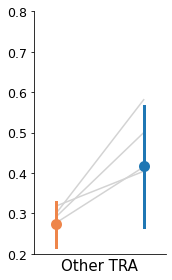

In [16]:
x=df_abundance[df_abundance.columns[df_abundance.columns!='length']].mean(axis=1)
gene_list=np.array(df_sleuth[df_sleuth.target_id.isin(np.array(x[(x>0) & (x<30)].index))].ext_gene)
df=df_High.append(df_Low)
df=df[df.Gene_Name.isin(gene_list)]
df=df[(df.Other_TRA==True)]
masked_df=1*(df[tpm]>0)
i=0
for feature in ['Annotations_short']:
    for name in tpm:
        if df[masked_df[name]==1].shape[0]>0:
            df2=df[masked_df[name]==1]
            total_genes=0
            misinitiated=0
            for gene in df2.Gene_Name.unique():
                unique=df2[df2.Gene_Name==gene].Annotations_short.unique()
                if 'promoter-TSS' in unique and len(unique)==1:
                    gene=0
                else:
                    gene=1
                total_genes=total_genes+1
                misinitiated=misinitiated+gene
            percentage=misinitiated/total_genes
            x=pd.DataFrame(np.vstack((feature,percentage,name.split('_')[0],name.split('_')[1],name,df[masked_df[name]==1].shape[0])).T,columns=['Feature','Percentage','Patient','Hue','pt','N'])
            if i==0:
                y=x
            else:
                y=y.append(x)
            i+=1
y.Percentage=y.Percentage.astype(float)

plt.figure(figsize=(2.5,4))
feature='Annotations_short'
for x in y.Patient.unique():
    plt.plot([0.5,0.1],[y[(y.Feature==feature) & (y.Patient==x) & (y.Hue=='hi')].Percentage,y[(y.Feature==feature) & (y.Patient==x) & (y.Hue=='lo')].Percentage],color='lightgray',zorder=1)

plt.scatter(0.5,y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.mean(),lw=5,zorder=3)
plt.plot([0.5,0.5],[y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.mean()+y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.std(),
               y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.mean()-y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.std()],lw=3,zorder=2)

plt.scatter(.1,y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.mean(),lw=5,zorder=3,color=sns.color_palette('muted')[1])
plt.plot([.1,.1],[y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.mean()+y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.std(),
                y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.mean()-y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.std()],lw=3,zorder=2, color=sns.color_palette('muted')[1])

print(stats.ttest_rel(y[(y.Feature==feature) & (y.Hue=='lo')].Percentage,y[(y.Feature==feature) & (y.Hue=='hi')].Percentage))

plt.xlim([0,.6])
plt.ylim([.2,.8])
plt.xticks([])
plt.yticks(fontsize=12.5)
plt.xlabel('')
#plt.xlabel(fontsize=0)
plt.ylabel('',fontsize=15)
plt.xlabel('Other TRA',fontsize=15)
sns.despine() 
plt.tight_layout()
plt.savefig('Supplemental_Panels/SFig6C.png',transparent=True,dpi=500)
plt.show()
plt.close()

Ttest_relResult(statistic=-3.282960652082608, pvalue=0.030415964527421686)


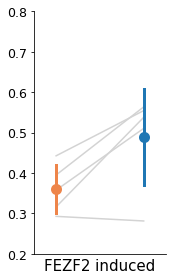

In [18]:
x=df_abundance[df_abundance.columns[df_abundance.columns!='length']].mean(axis=1)
gene_list=np.array(df_sleuth[df_sleuth.target_id.isin(np.array(x[(x>10) & (x<30)].index))].ext_gene)
df=df_High.append(df_Low)
df=df[df.Gene_Name.isin(gene_list)]
df=df[(df.Housekeeping==True)]
masked_df=1*(df[tpm]>0)
i=0
for feature in ['Annotations_short']:
    for name in tpm:
        if df[masked_df[name]==1].shape[0]>4:
            df2=df[masked_df[name]==1]
            total_genes=0
            misinitiated=0
            for gene in df2.Gene_Name.unique():
                unique=df2[df2.Gene_Name==gene].Annotations_short.unique()
                if 'promoter-TSS' in unique and len(unique)==1:
                    gene=0
                else:
                    gene=1
                total_genes=total_genes+1
                misinitiated=misinitiated+gene
            percentage=misinitiated/total_genes
            x=pd.DataFrame(np.vstack((feature,percentage,name.split('_')[0],name.split('_')[1],name,df[masked_df[name]==1].shape[0])).T,columns=['Feature','Percentage','Patient','Hue','pt','N'])
            if i==0:
                y=x
            else:
                y=y.append(x)
            i+=1
y.Percentage=y.Percentage.astype(float)

plt.figure(figsize=(2.5,4))
feature='Annotations_short'
for x in y.Patient.unique():
    plt.plot([0.5,0.1],[y[(y.Feature==feature) & (y.Patient==x) & (y.Hue=='hi')].Percentage,y[(y.Feature==feature) & (y.Patient==x) & (y.Hue=='lo')].Percentage],color='lightgray',zorder=1)

plt.scatter(0.5,y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.mean(),lw=5,zorder=3)
plt.plot([0.5,0.5],[y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.mean()+y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.std(),
               y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.mean()-y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.std()],lw=3,zorder=2)

plt.scatter(.1,y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.mean(),lw=5,zorder=3,color=sns.color_palette('muted')[1])
plt.plot([.1,.1],[y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.mean()+y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.std(),
                y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.mean()-y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.std()],lw=3,zorder=2, color=sns.color_palette('muted')[1])
 

print(stats.ttest_rel(y[(y.Feature==feature) & (y.Hue=='lo')].Percentage,y[(y.Feature==feature) & (y.Hue=='hi')].Percentage))

plt.xlim([0,.6])
plt.ylim([.2,.8])
plt.xticks([])
plt.yticks(fontsize=12.5)
plt.xlabel('')
#plt.xlabel(fontsize=0)
plt.ylabel('',fontsize=15)
plt.xlabel('FEZF2 induced',fontsize=15)
sns.despine() 
plt.tight_layout()
plt.savefig('Supplemental_Panels/SFig6D.png',transparent=True,dpi=500)
plt.show()
plt.close()

In [19]:
y

,Feature,Percentage,Patient,Hue,pt,N
0,Annotations_short,0.510417,pt212,hi,pt212_hi_TPM,101
0,Annotations_short,0.281250,pt221,hi,pt221_hi_TPM,32
0,Annotations_short,0.563636,pt226,hi,pt226_hi_TPM,57
0,Annotations_short,0.554455,pt87,hi,pt87_hi_TPM,107
0,Annotations_short,0.537815,pt214,hi,pt214_hi_TPM,123
0,Annotations_short,0.357616,pt212,lo,pt212_lo_TPM,164
0,Annotations_short,0.292683,pt221,lo,pt221_lo_TPM,44
0,Annotations_short,0.395062,pt226,lo,pt226_lo_TPM,85
0,Annotations_short,0.442529,pt87,lo,pt87_lo_TPM,195
0,Annotations_short,0.316062,pt214,lo,pt214_lo_TPM,212
